              precision    recall  f1-score   support

           0       0.86      0.64      0.73       323
           1       0.57      0.83      0.68       189

    accuracy                           0.71       512
   macro avg       0.72      0.73      0.70       512
weighted avg       0.75      0.71      0.71       512



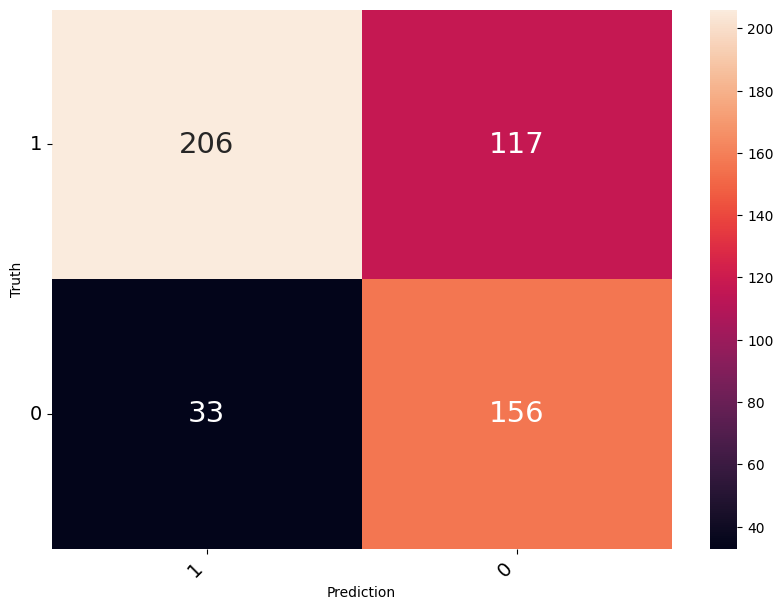

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns
import re

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 21})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

ground_truth = []
model_predictions = []
true_positives = 0
false_positives = 0
false_negatives = 0

#Create lists of manual and predicted classifications.
#Load file with input values.
fi = open('{PATH}', 'r', encoding="utf8")
input_lines = fi.readlines()
fi.close()

for line in input_lines:
    line_list = line.replace('\n', '').lower().split(';')[1:]
    for i in range(0, 3):
        if 'yes' in line_list[i]:
            line_list[i] = 1
        else:
            line_list[i] = 0
    ground_truth.append(line_list)

#Load file with output values.
fo = open('{PATH}', 'r', encoding="utf8")
output_lines = fo.readlines()
fo.close()

for line in output_lines:
    line_list = line.replace('\n', '').lower().split(';')[1:]
    for i in range(0, 3):
        if 'да' in line_list[i]:
            line_list[i] = 1
        else:
            line_list[i] = 0
    if len(line_list) == 3:
        line_list.append(0)
    model_predictions.append(line_list)
for i in range(len(model_predictions)):
    if model_predictions[i][-1] == '0':
            model_predictions[i][-1] = 0
    else:
        dur_gen = re.findall(r'\d+', str(model_predictions[i][-1]))
        dur_real = re.findall(r'\d+', str(ground_truth[i][-1]))
        if dur_gen == []:
            model_predictions[i][-1] = 0
        else:
            for j in range(len(dur_gen)):
                if dur_gen[j] in dur_real:
                    model_predictions[i][-1] = 1
                    break
                else:
                    model_predictions[i][-1] = 0

for i in range(len(ground_truth)):
    if ground_truth[i][-1] == '0':
        ground_truth[i][-1] = 0
    else:
        ground_truth[i][-1] = 1

ground_truth = [item for sublist in ground_truth for item in sublist]
model_predictions = [item for sublist in model_predictions for item in sublist]

#Calculate F-score.
print(classification_report(ground_truth, model_predictions, zero_division=1.0))

#Visualize confusion matrix.
cm = confusion_matrix(ground_truth,model_predictions)
print_confusion_matrix(cm,[1,0])